Чулуунбаатар Хулан
НПМбд-01-19






1. импортируем необходимые библиотеки

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

2. при помощи функции matplotlib.pyplot.imshow получаем массивы картинок из X.


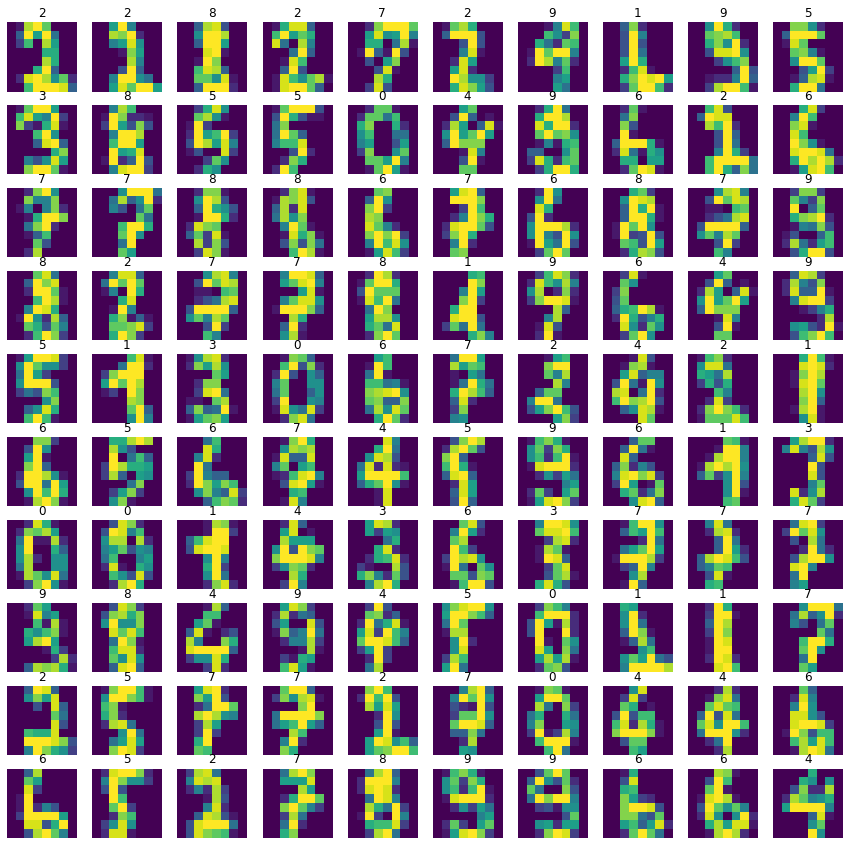

In [33]:
digits = load_digits()
X = digits['data']
labels = digits['target']
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        t = np.random.randint(0, 1797)
        ax[i, j].imshow(X[t,:].reshape(8,8))
        ax[i, j].set_title(labels[t])
        ax[i, j].axis('off')

                                                        PCA

Метод главных компонент состоит из следующих 4-х шагов:

1.центрирование данных: 
 =  - 
 
, где 
 
 - среднее для каждого параметра.
2.вычисление матрицы ковариации:  = 
.

3.вычисление собственных векторов  и значений  матрицы ковариации .

4.преобразование данных в координаты в базисе главных компонент 
.

In [34]:
class my_PCA():
    #n_compoments -число компонент
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        Xc = X
        m = np.mean(Xc, axis = 0)
        Xc -= m
        C = Xc.T.dot(Xc)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        return Xc, F, l
        
    def transform(self, X, F):
        return X.dot(F)

    def fit_transform(self, X):
        Xc1, F, lambda_ = self.fit(X)
        Y = self.transform(Xc1, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

построим график собственных значений матрицы и график отношения кумулятивной суммы

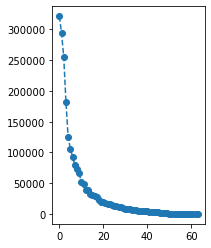

In [35]:
test = my_PCA(2)
_, _, l = test.fit(X)
plt.subplot(1,2,1)
plt.plot(l, marker = 'o', linestyle = '--')

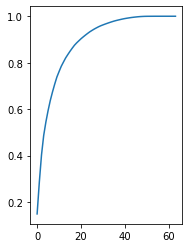

In [36]:
plt.subplot(1,2,2)
plt.plot(np.cumsum(l) / np.sum(l))

изобразим на графике точки датасета в первых двух координатах главных компонент

Y = test.fit_transform(X)
plt.scatter(Y[:,0], Y[:,1], c = labels, cmap = 'Accent')
plt.colorbar()

                                                         kNN

метод init сохраняет параметр n_neighbors во внутреннюю переменную self.n_neighbors

метод fit сохраняет переданные обучающие данные X_train и y_train во внутренние переменные self.X_train и self.y_train соответственно

метод predict - вычисление возможного класса, к которому принадлежит тестируемый объект

In [37]:
class kNN():
    def __init__(self, n_neighbors=5):
        #n_neighbors - количество "соседей"
        self.n_neighbors = n_neighbors
        
    def fit(self, X_train, labels_train):
        #сохраняет переданные обучающие данные во внутренние переменные
        self.X_train = X_train
        self.labels_train = labels_train
        
    def predict(self, X_test):
        #вычисляет расстояния до всех точек из обучающей выборки
        #выбирает n_neighbors точек с наименьшими расстояниями
        #оставляет самого часто встречающего "соседа"
        neighbors = []
        for x in X_test:
            r = np.sqrt(np.sum((x - self.X_train)**2, axis=1))  #расстояние от х из X до точек из X_train
            labels_sorted = [i for _, i in sorted(zip(r, self.labels_train))]  #расстояния и ответ (цифры) в виде таплов
            neighbors.append(labels_sorted[:self.n_neighbors])
        result = []
        for ar in neighbors:
            result.append(max(ar, key=ar.count))
        return result

считаем точность вычислений при разном числе соседей и разном количестве главных компонент

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.47, random_state=42)

for i in range (1, 30, 7):
    test_knn = kNN(i)
    test_knn.fit(X_train, y_train)
    y_knn = test_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn) * 100
    print("точность при k =", i, ':', accuracy)

точность при k = 1 : 98.34319526627219
точность при k = 8 : 97.15976331360947
точность при k = 15 : 96.33136094674556
точность при k = 22 : 95.38461538461539
точность при k = 29 : 93.72781065088758


In [98]:
test = my_PCA(2)
Y = test.fit_transform(X)
print ("количество компонент = 2")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.47, random_state=42)

for i in range (1, 30, 7):
    test_knn = kNN(i)
    test_knn.fit(X_train, y_train)
    y_knn = test_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn) * 100
    print("точность при k =", i, ':', accuracy)

количество компонент = 2
точность при k = 1 : 59.171597633136095
точность при k = 8 : 63.55029585798817
точность при k = 15 : 65.44378698224853
точность при k = 22 : 64.97041420118343
точность при k = 29 : 64.73372781065089


In [99]:
test = my_PCA(5)
Y = test.fit_transform(X)
print ("количество компонент = 5")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.47, random_state=42)

for i in range (1, 30, 7):
    test_knn = kNN(i)
    test_knn.fit(X_train, y_train)
    y_knn = test_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn) * 100
    print("точность при k =", i, ':', accuracy)

количество компонент = 5
точность при k = 1 : 90.41420118343196
точность при k = 8 : 90.88757396449704
точность при k = 15 : 90.76923076923077
точность при k = 22 : 89.46745562130177
точность при k = 29 : 88.63905325443787


In [100]:
test = my_PCA(18)
Y = test.fit_transform(X)
print ("количество компонент = 18")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.47, random_state=42)

for i in range (1, 30, 7):
    test_knn = kNN(i)
    test_knn.fit(X_train, y_train)
    y_knn = test_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn) * 100
    print("точность при k =", i, ':', accuracy)

количество компонент = 18
точность при k = 1 : 97.98816568047337
точность при k = 8 : 97.39644970414201
точность при k = 15 : 95.85798816568047
точность при k = 22 : 95.26627218934911
точность при k = 29 : 93.96449704142012


In [107]:
test = my_PCA(21)
Y = test.fit_transform(X)
print ("количество компонент = 21")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.47, random_state=42)

for i in range (1, 30, 7):
    test_knn = kNN(i)
    test_knn.fit(X_train, y_train)
    y_knn = test_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn) * 100
    print("точность при k =", i, ':', accuracy)

количество компонент = 21
точность при k = 1 : 98.22485207100591
точность при k = 8 : 97.51479289940829
точность при k = 15 : 95.85798816568047
точность при k = 22 : 95.14792899408285
точность при k = 29 : 93.84615384615384


In [110]:
test = my_PCA(29)
Y = test.fit_transform(X)
print ("количество компонент = 29")

X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.47, random_state=42)

for i in range (1, 30, 7):
    test_knn = kNN(i)
    test_knn.fit(X_train, y_train)
    y_knn = test_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn) * 100
    print("точность при k =", i, ':', accuracy)

количество компонент = 29
точность при k = 1 : 98.34319526627219
точность при k = 8 : 97.15976331360947
точность при k = 15 : 95.97633136094674
точность при k = 22 : 95.38461538461539
точность при k = 29 : 93.72781065088758


следовательно, наибольшая точность наблюдается при k = 1 и количестве компонент = 29